In [1]:
# Import libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.request import urlopen
from urllib.request import Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from finvizfinance.quote import finvizfinance

In [5]:
import requests
import pandas as pd
import arrow
import datetime

In [4]:
from yahooquery import Ticker
import pytz
from pytz import timezone
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pickle
import math
import matplotlib.pyplot as plt

In [3]:
from main_logic import *
from helper import *

In [6]:
pd.options.display.max_columns = None

### stock history data
- Stock dict his example
- Purpose reduce api call, save money
```
stock_dict_his = {
     Symbol: {
       date: {
           general: blablabla,
           intraday: blablabla 
       }
     }
}
```

### Load stock history dictionary

In [7]:
stock_his_dict = pickle.load(open("./data/stock_his_dict.p", "rb"))

### Save stock history dictionary

In [17]:
pickle.dump(stock_his_dict, open("./data/stock_his_dict.p", "wb"))

### Load dataframe

In [8]:
total_df = pd.read_feather("./data/total_df.feather")

In [10]:
compressed_df = pd.read_feather("./data/compressed_df.feather")

### Save dataframe

In [401]:
total_df.to_feather("./data/df_with_stock.feather")

### Generate News

In [5]:
# total_df = pd.read_feather("./data/df_with_stock.feather")

In [61]:
total_df = generate_news_df()

### Perform sentiment analysis

In [8]:
perform_sentiment_analysis(total_df, ANALYZER)

### Calculate stock performance based on news' published date

In [2]:
calculate_stock_performance_with_different_lag(total_df, STOCK_API_TOKEN, stock_his_dict, lag_strs=['7d'])

### Compress dataframe by date

In [20]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26431 entries, 0 to 26430
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   symbol                 26431 non-null  object        
 1   Date_str               26431 non-null  object        
 2   Date                   26431 non-null  datetime64[ns]
 3   Title                  26431 non-null  object        
 4   Link                   26431 non-null  object        
 5   Sentiment_Neg          26431 non-null  float64       
 6   Sentiment_Neu          26431 non-null  float64       
 7   Sentiment_Pos          26431 non-null  float64       
 8   Sentiment_Compound     26431 non-null  float64       
 9   price_publish          26431 non-null  float64       
 10  price_after_1m         26431 non-null  float64       
 11  used_1m                26431 non-null  bool          
 12  price_after_5m         26431 non-null  float64       
 13  u

In [12]:
compressed_df = compress_df_by_date(total_df, '1d')

In [1]:
compressed_df_7d = compress_df_by_date(total_df, '7d')

In [11]:
compressed_df.head()

symbol    Date_str  Sentiment_Neg  Sentiment_Neu  Sentiment_Pos  \
0    aal  2021-03-30         0.0000        1.00000        0.00000   
1    aal  2021-03-31         0.0600        0.84000        0.10000   
2    aal  2021-04-01         0.1155        0.88450        0.00000   
3    aal  2021-04-05         0.0000        0.83775        0.16225   
4    aal  2021-04-06         0.0000        1.00000        0.00000   

   Sentiment_Compound  price_publish  price_after_1d  used_1d  performance_1d  \
0             0.00000        24.0300        23.90000     True       -0.005425   
1             0.06100        24.0250        23.88000     True       -0.006054   
2            -0.13660        24.0200        23.86000     True       -0.006683   
3             0.18225        24.4025        24.15075     True       -0.010370   
4             0.00000        24.0470        23.85700     True       -0.007933   

   performance_1d_scaled  
0               0.312275  
1               0.309918  
2               0.307558  
3               0.293745  
4               0.302878

### Calculate metric

In [400]:
calculate_metric_within_oneday(total_df, lag_strs=['1m', '5m', '1h'])
calculate_metric_within_oneday(compressed_df, lag_strs=['1d'])

In [17]:
compressed_df.to_feather("./data/compressed_df.feather")

### Draw dictribution map

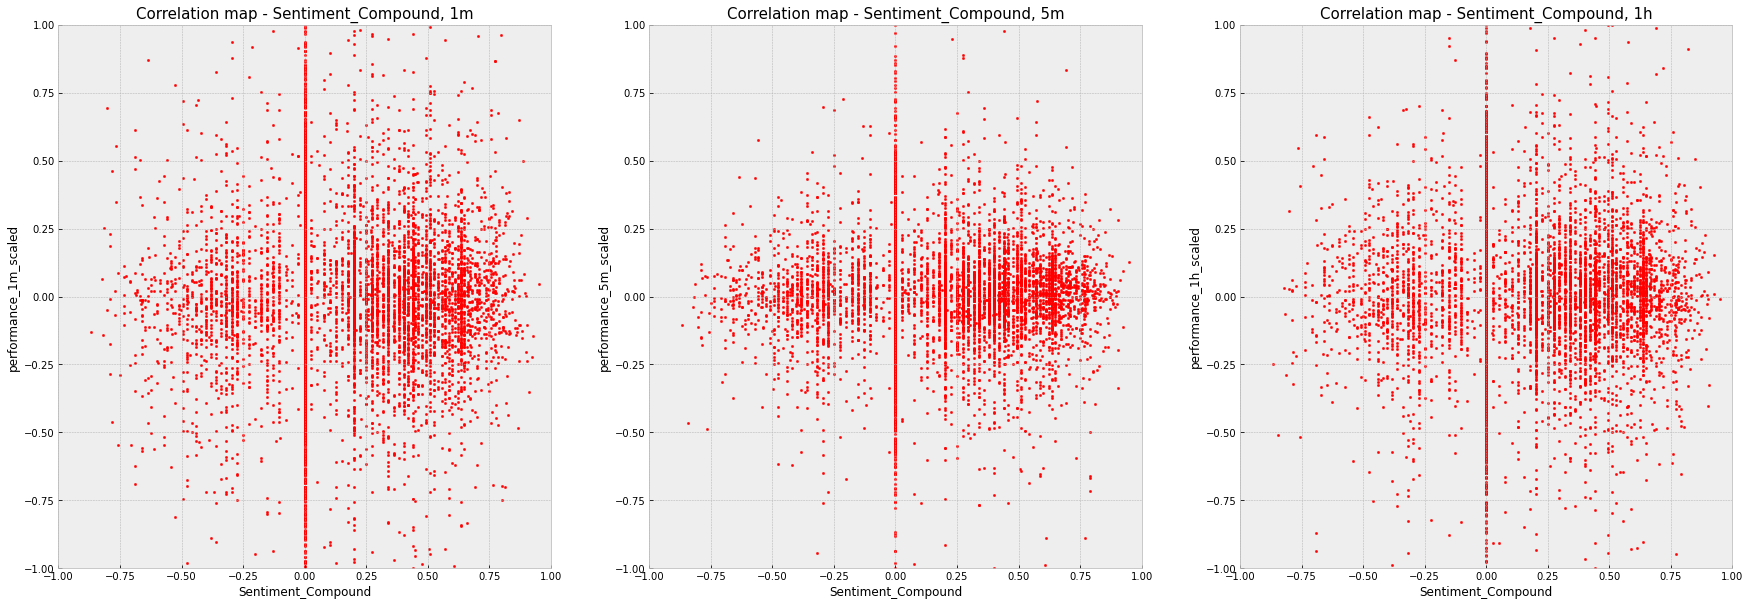

In [403]:
draw_plot(total_df, ['1m', '5m', '1h'], use_scaled_data=True)

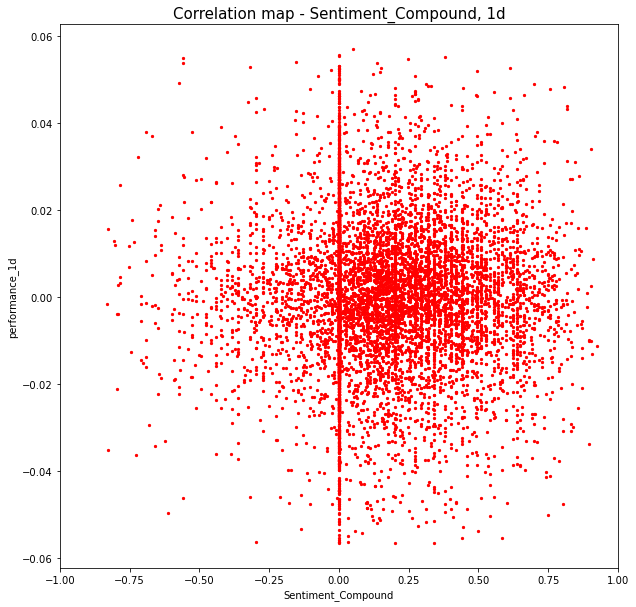

In [340]:
draw_plot(compressed_df, ['1d'], use_scaled_data=True)

### Draw trend map

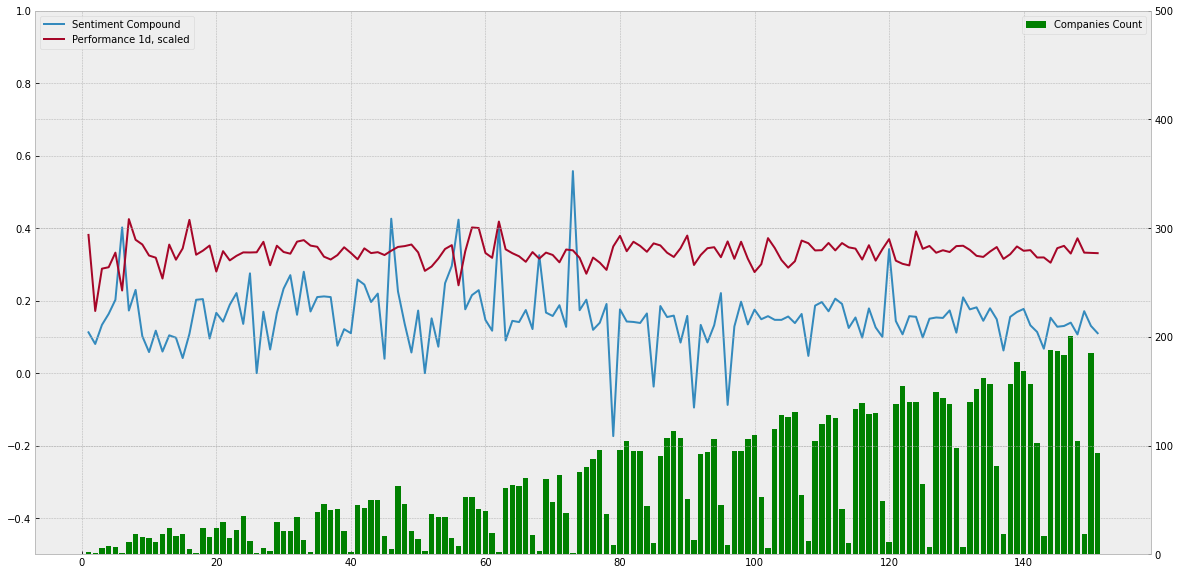

In [404]:
draw_figure_by_date(compressed_df, limit=-1)

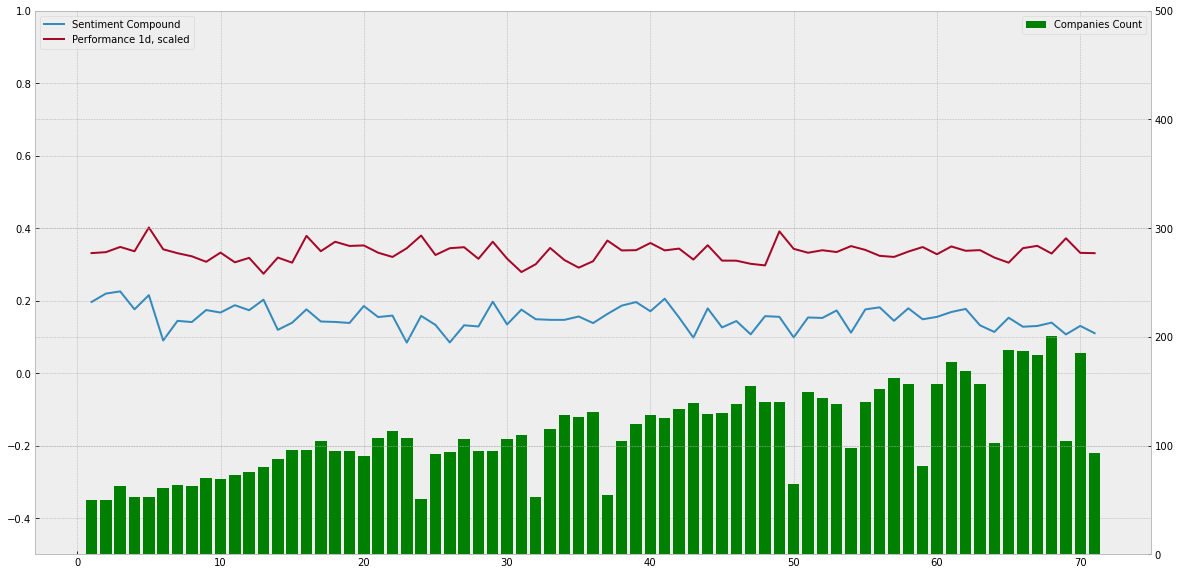

In [405]:
draw_figure_by_date(compressed_df, limit=50)

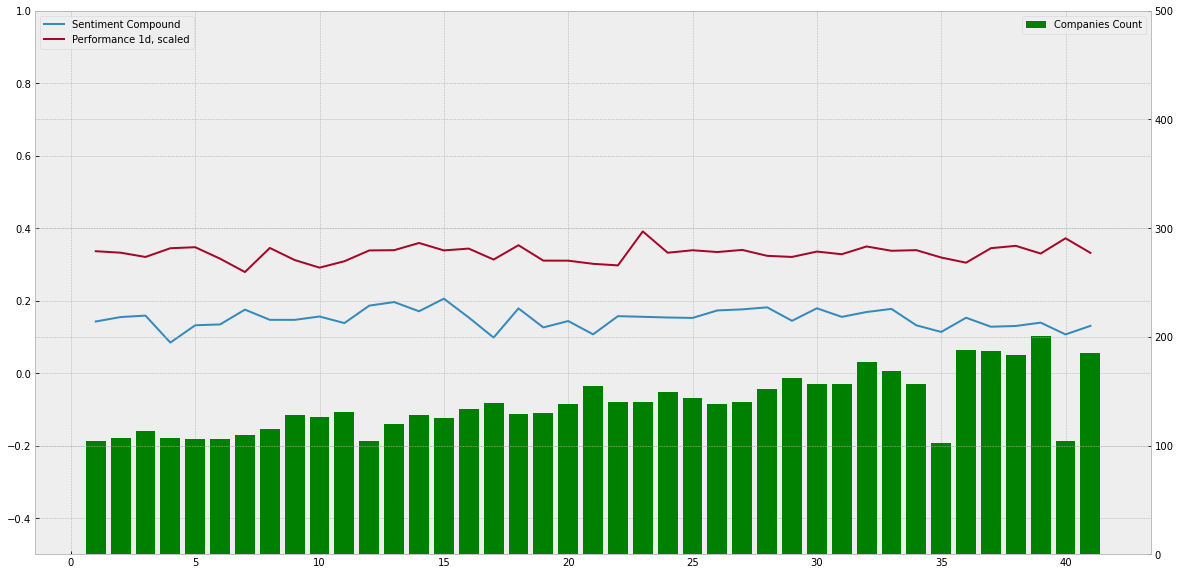

In [396]:
draw_figure_by_date(compressed_df, limit=100)

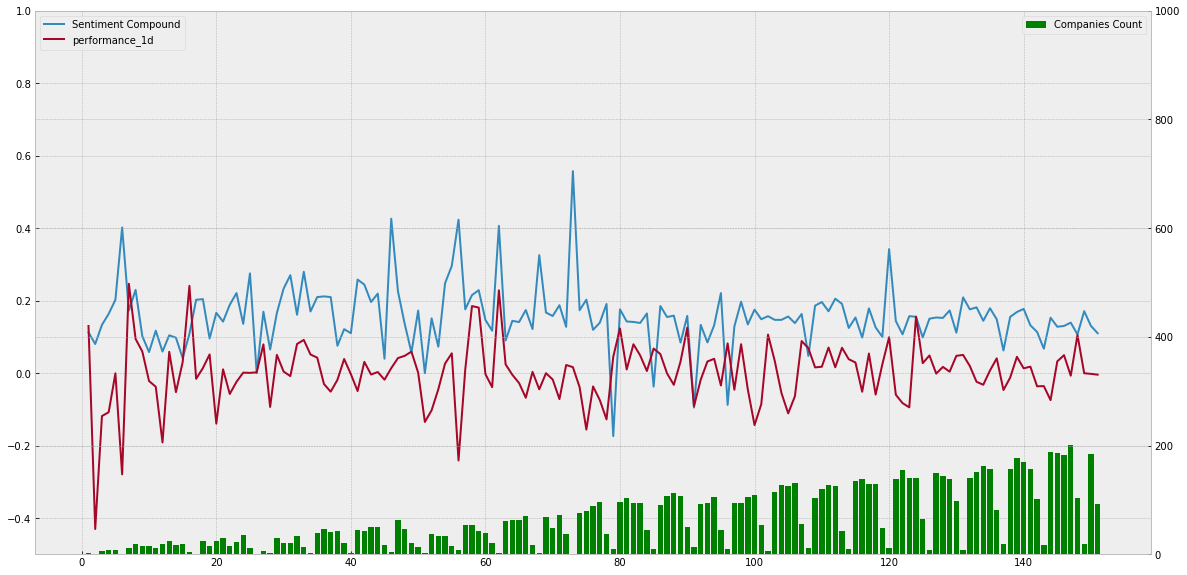

In [39]:
draw_figure_by_date(compressed_df, limit=-1, use_scaled=False, scaled_ratio=10)

### Confusion matrix

In [346]:
compute_confusion_matrix(total_df, ['1m', '5m', '1h'], sentiment_keyword="Sentiment_Compound")

Outlier removed, range: 3
performance_1m
+----------------------+--------------------+--------------------+
|                      | Sentiment Positive | Sentiment Negative |
+----------------------+--------------------+--------------------+
| Performance Positive | 2050               | 547                |
+----------------------+--------------------+--------------------+
| Performance Negative | 1895               | 654                |
+----------------------+--------------------+--------------------+

performance_5m
+----------------------+--------------------+--------------------+
|                      | Sentiment Positive | Sentiment Negative |
+----------------------+--------------------+--------------------+
| Performance Positive | 2098               | 608                |
+----------------------+--------------------+--------------------+
| Performance Negative | 1922               | 621                |
+----------------------+--------------------+--------------------+

perf

In [345]:
compute_confusion_matrix(compressed_df, ['1d'], sentiment_keyword="Sentiment_Compound")

Outlier removed, range: 3
performance_1d
+----------------------+--------------------+--------------------+
|                      | Sentiment Positive | Sentiment Negative |
+----------------------+--------------------+--------------------+
| Performance Positive | 2694               | 559                |
+----------------------+--------------------+--------------------+
| Performance Negative | 2603               | 562                |
+----------------------+--------------------+--------------------+




(3,)


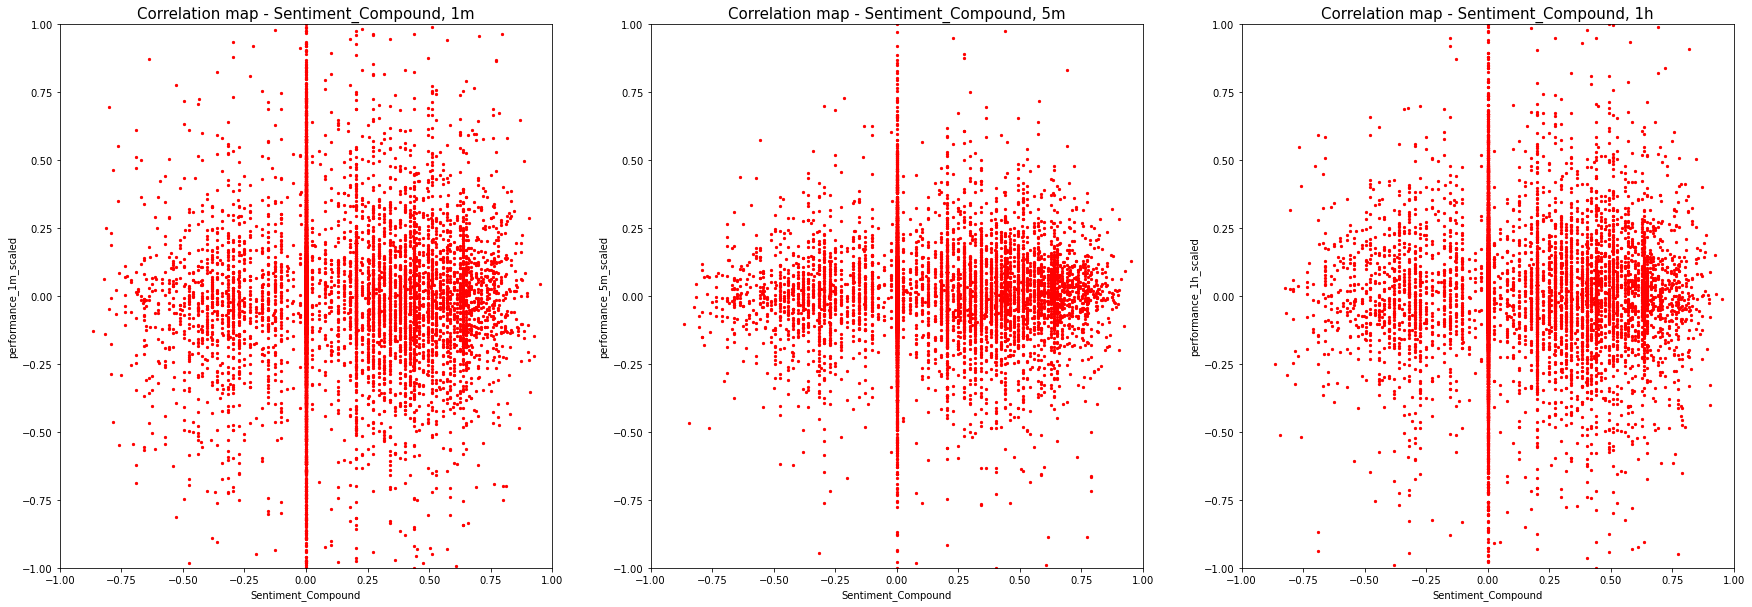

In [274]:
draw_plot(total_df, ['1m', '5m', '1h'], remove_zero_sent=False)